In [2]:
from PostProcessing.PatchPostProcessing import PatchAverage, PatchMagnitude
import pandas as pd
import matplotlib
%pylab inline
import os
import numpy as np
os.getcwd()

Populating the interactive namespace from numpy and matplotlib


'/media/timo/sharedParti/Cavitation/compMultiphaseCavitation_validation/Branches/master/Uinlet_grid8_2_3_corrDamagedCell_study/hemisphericalHead_2D_grid8_2_3_corrDCell_totalpmyWave_sim001'

In [42]:
p_outlet = PatchAverage("p", "Outlet")
p_inlet = PatchAverage("p", "Inlet")
U_inlet_mag = PatchMagnitude("U", "Inlet")
U_inlet_avgmag = PatchAverage("mag(U)", "Inlet")
#U_inlet_avgmag.resultsDataFrame

## Beschleunigungs Phase

Text(0,0.5,'mag(U) (in)')

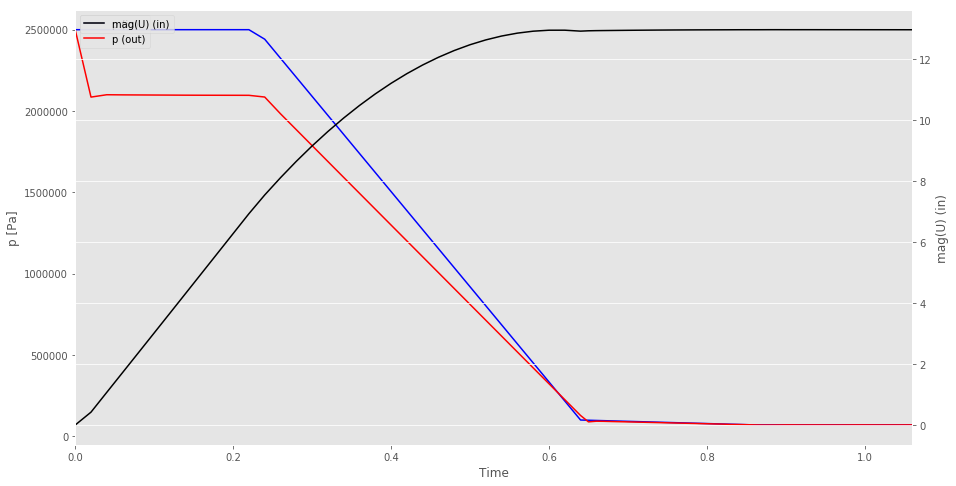

In [43]:
df_p_inlet = p_inlet.resultsDataFrame
df_p_outlet = p_outlet.resultsDataFrame
df_U_inlet_avgmag = U_inlet_avgmag.resultsDataFrame

df_plotting = df_p_inlet
df_plotting["p_in"] = df_plotting["Value"]
df_plotting = df_plotting.drop(['Value', 'Field', 'ValueType', 'Patch'], axis=1)
df_plotting["p_in"] = df_p_inlet.iloc[:]["Value"]
df_plotting["p_out"] = df_p_outlet.iloc[:]["Value"]
df_plotting["magU_in"] = df_U_inlet_avgmag.iloc[:]["Value"]

#adding the cavitation number sigma
df_plotting.iloc[:]["pSat"] = 2337
df_plotting.iloc[:]["rho"] = 1000
df_plotting["sigma"] = (df_plotting["p_in"]- df_plotting["pSat"])/(0.5 * df_plotting["rho"] * (df_plotting["magU_in"])**2)


range2 = 1
#df_p_inlet = df_p_inlet[range2:]
#df_p_outlet = df_p_outlet[range2:]
#df_U_inlet_avgmag = df_U_inlet_avgmag[range2:]

#ax1 = df_p_inlet.plot(kind='scatter', y="Value", x="Time", figsize=(15,15), color="blue")
#ax1.set_ylabel('Pressure p [Pa]')
#ax2 = df_p_outlet.plot(kind='scatter', y="Value", x="Time", legend=True, ax=ax1, color="red")
#ax2.legend(["p Outlet"])
#ax3 = df_U_inlet_avgmag.plot(kind='line', secondary_y=True, y="Value", x="Time",legend=True,  ax=ax1, color="black")
#ax3.legend(["mag(U) Inlet"])
#ax3.set_ylabel('mag(U) Inlet')

#df_plotting = df_plotting[range2:]

ax1 = df_plotting.plot(kind='line', y="p_in", x="Time", figsize=(15,8), color="blue", legend=True)
ax2 = df_plotting.plot(kind='line', y="p_out", x="Time", ax=ax1, color="red", legend=True)
ax3 = df_plotting.plot(kind='line', secondary_y=True, y="magU_in", x="Time",  ax=ax1, color="black", legend=True)
ax1.legend(["p (in)", "p (out)"], loc='upper left')
ax1.set_ylabel("p [Pa]")
ax1.right_ax.legend(["mag(U) (in)"])
ax1.right_ax.set_ylabel("mag(U) (in)")

In [44]:
len(df_plotting["sigma"])

75

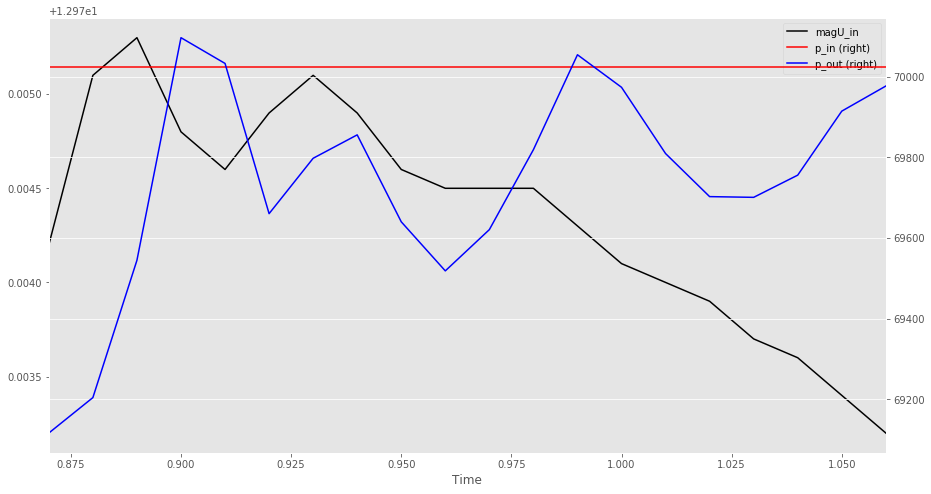

In [49]:
df_smaller = df_plotting[55:]
ax10 = df_smaller.plot(kind='line', y="magU_in", x="Time",figsize=(15,8),  color="black", legend=True)
df_smaller.plot(kind='line', secondary_y=True, y="p_in", x="Time",  ax=ax10, color="red", legend=True)
df_smaller.plot(kind='line', secondary_y=True, y="p_out", x="Time",  ax=ax10, color="blue", legend=True)

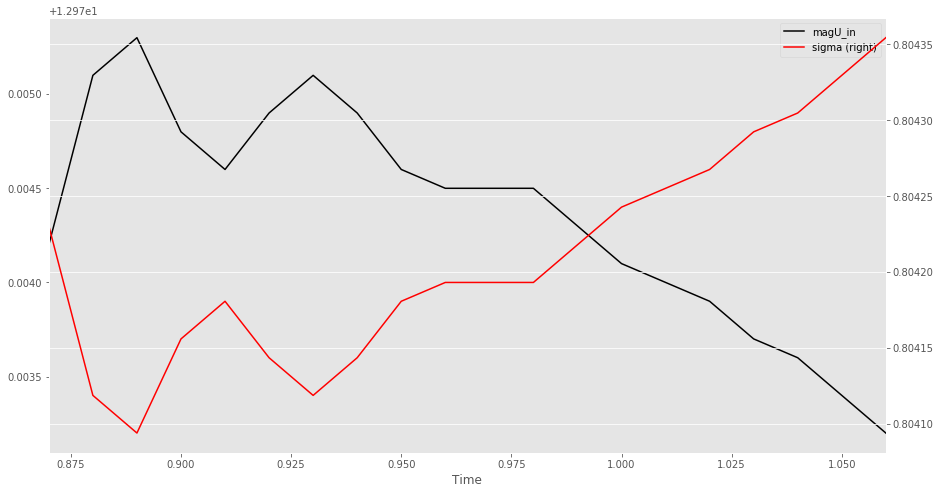

In [50]:
df_smaller = df_plotting[55:]
ax10 = df_smaller.plot(kind='line', y="magU_in", x="Time",figsize=(15,8),  color="black", legend=True)
df_smaller.plot(kind='line', secondary_y=True, y="sigma", x="Time",  ax=ax10, color="red", legend=True)

In [47]:
df_smaller

,Time,p_in,p_out,magU_in,pSat,rho,sigma
38,0.70,91825.0,88426.2,12.9549,2337,1000,1.066416
39,0.71,90462.5,87317.5,12.9572,2337,1000,1.049807
40,0.72,89100.0,86160.6,12.9593,2337,1000,1.033241
41,0.73,87737.5,85055.9,12.9613,2337,1000,1.016701
42,0.74,86375.0,83920.4,12.9631,2337,1000,1.000203
43,0.75,85012.5,82788.5,12.9647,2337,1000,0.983744
44,0.76,83650.0,81623.1,12.9661,2337,1000,0.967322
45,0.77,82287.5,80525.1,12.9674,2337,1000,0.950923
46,0.78,80925.0,79340.3,12.9685,2337,1000,0.934559
47,0.79,79562.5,78205.9,12.9694,2337,1000,0.918229
